# Partiamo dalla Regressione Lineare Semplice
La regressione lineare semplice o a variabile singola è il caso più semplice di regressione lineare, poiché ha un'unica variabile indipendente, 𝐱 = 𝑥.

La figura seguente illustra una regressione lineare semplice:

<br>

![grafico](./dati/img/grafico%20regressione%20lineare%20semplice.webp)


Quando si implementa una regressione lineare semplice, in genere si inizia con un determinato insieme di coppie input-output (𝑥-𝑦). Queste coppie sono le tue osservazioni, mostrate come cerchi verdi nella figura. Ad esempio, l'osservazione più a sinistra ha l'input 𝑥 = 5 e l'output effettivo, o risposta, 𝑦 = 5. Quella successiva ha 𝑥 = 15 e 𝑦 = 20 e così via.

La funzione di regressione stimata, rappresentata dalla linea nera, ha l'equazione 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥. Il nostro obiettivo è calcolare i valori ottimali dei pesi previsti 𝑏₀ e 𝑏₁ che minimizzano l'SSR e determinano la funzione di regressione stimata.

Il valore di 𝑏₀, chiamato anche intercetta , mostra il punto in cui la linea di regressione stimata incrocia l'asse 𝑦. È il valore della risposta stimata 𝑓(𝑥) per 𝑥 = 0. Il valore di 𝑏₁ determina la pendenza della linea di regressione stimata.

Le risposte previste, visualizzate come quadrati rossi, sono i punti sulla linea di regressione che corrispondono ai valori di input. Ad esempio, per l'input 𝑥 = 5, la risposta prevista è 𝑓(5) = 8,33, che rappresenta il quadrato rosso più a sinistra.

Le linee grigie tratteggiate verticali rappresentano i residui, che possono essere calcolati come 𝑦ᵢ - 𝑓(𝐱ᵢ) = 𝑦ᵢ - 𝑏₀ - 𝑏₁𝑥ᵢ per 𝑖 = 1, …, 𝑛. Sono le distanze tra i cerchi verdi e i quadrati rossi. Quando implementiamo la regressione lineare, stiamo effettivamente cercando di ridurre al minimo queste distanze e di rendere i quadrati rossi il più vicino possibile ai cerchi verdi predefiniti.

### Ora andiamo a implementare la regressione lineare semplice con la libreria scikit-learn

# Esistono cinque passaggi fondamentali quando si implementa la regressione lineare:

1) Installare e importare i pacchetti e le classi di cui abbiamo bisogno.
2) Fornire i dati con cui lavorare ed eventualmente eseguire le trasformazioni appropriate.
3) Creare un modello di regressione e adattarlo ai dati esistenti.
4) Controllare i risultati dell'adattamento del modello per sapere se il modello è soddisfacente.
5) Applicare il modello per le previsioni.

### Passaggio 1: importa pacchetti e classi

Il primo passo è installare e importare il pacchetto numpy e installare sklearn e importare la classe Linear Regression da sklearn.linear_model:

In [1]:
!pip install numpy scikit-learn matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Roman\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Ora abbiamo tutte le funzionalità necessarie per implementare la regressione lineare.

Il tipo di dati fondamentale di NumPy è il tipo di array chiamato numpy.ndarray. Nel resto di questo esercizio utilizzeremo il termine array per fare riferimento a istanze del tipo numpy.ndarray.

Utilizzeremo la classe sklearn.linear_model.LinearRegression per eseguire regressioni lineari fare previsioni di conseguenza.

### Passaggio 2: fornire i dati

Il secondo passo è definire i dati con cui lavorare. Gli input (regressori, 𝑥) e l'output (risposta, 𝑦) dovrebbero essere array o oggetti simili. Questo è il modo più semplice per fornire dati per la regressione:

In [3]:
X = np.array([5, 15, 25, 35, 45, 55])
X

array([ 5, 15, 25, 35, 45, 55])

In [4]:
X = X.reshape((-1, 1))
print(X)
y = np.array([5, 20, 14, 32, 22, 38])

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]


Ora abbiamo due array: l'input, X e l'output, y. Utilizzeremo .reshape() perché questo array deve essere bidimensionale o, più precisamente, deve avere una colonna e tutte le righe necessarie . Questo è esattamente ciò che specifica l'argomento (-1, 1)di .reshape().

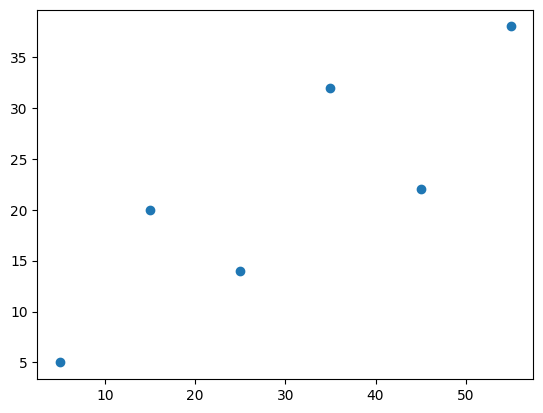

In [5]:
plt.scatter(X,y)
plt.show()

Come possiamo vedere, X ha due dimensioni, mentre y ha una sola dimensione.

### Passaggio 3: crea un modello e adattalo

Il passaggio successivo consiste nel creare un modello di regressione lineare e adattarlo utilizzando i dati esistenti.

Creiamo un'istanza della classe LinearRegression, che rappresenterà il modello di regressione:

In [6]:
model = LinearRegression()

Questa istruzione crea la variabile model come istanza di LinearRegression. È possibile fornire diversi parametri facoltativi per LinearRegression:

- fit_intercept è un booleano che, se True, decide di calcolare l'intercetta 𝑏₀ oppure, se False, la considera uguale a zero. Il valore predefinito è True.
- normalize è un booleano che, se True, decide di normalizzare le variabili di input. Il valore predefinito è False, nel qual caso non normalizza le variabili di input.
- copy_X è un booleano che decide se copiare ( True) o sovrascrivere le variabili di input ( False). È True per impostazione predefinita.
- n_jobs è un numero intero o None. Rappresenta il numero di iterazioni utilizzate nel calcolo parallelo. Il valore predefinito è None, che di solito significa una iterazione. -1 significa utilizzare tutti i processori disponibili.

Sopra abbiamo definito model utilizzando i valori predefiniti di tutti i parametri.

È ora di iniziare a utilizzare il modello. 
#### Per prima cosa è necessario chiamare .fit() model:

In [7]:
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Con .fit(), calcoliamo i valori ottimali dei pesi 𝑏₀ e 𝑏₁, utilizzando l'input e l'output esistenti X e y, come argomenti. In altre parole, .fit() si adatta al modello . Restituisce self, che è la variabile model stessa.

### Passaggio 4: ottieni risultati

Una volta adattato il modello, è possibile ottenere i risultati per verificare se il modello funziona in modo soddisfacente e per interpretarlo.

È possibile ottenere il coefficiente di determinazione, 𝑅², con .score() chiamato su model:

In [8]:
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


Quando si applica .score(), gli argomenti sono anche il predittore X e la risposta y e il valore restituito è 𝑅².

Gli attributi di model sono .intercept_, che rappresenta il coefficiente 𝑏₀, e .coef_, che rappresenta 𝑏₁:

In [9]:
print(f"intercept: {model.intercept_}")


print(f"slope: {model.coef_}")

intercept: 5.633333333333329
slope: [0.54]


<b>Nota</b>: in scikit-learn, per convenzione , un carattere di sottolineatura finale indica che un attributo è stimato. In questo esempio, .intercept_e .coef_sono valori stimati.

Il valore di 𝑏₀ è circa 5,63. Ciò dimostra che il nostro modello prevede la risposta 5,63 quando 𝑥 è zero. Il valore 𝑏₁ = 0,54 significa che la risposta prevista aumenta di 0,54 quando 𝑥 viene aumentato di uno.

Possiamo fornire y anche come un array bidimensionale. In questo caso, otterremo un risultato simile. Ecco come potrebbe apparire:

In [10]:
new_model = LinearRegression().fit(X, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")


print(f"slope: {new_model.coef_}")

intercept: [5.63333333]
slope: [[0.54]]


### Passaggio 5: prevedere la risposta

Una volta ottenuto un modello soddisfacente, è possibile utilizzarlo per previsioni con dati esistenti o nuovi. Per ottenere la risposta prevista, utilizzeremo .predict():

In [11]:
y_pred = model.predict(X)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


Quando si applica .predict(), si passa il regressore come argomento e si ottiene la risposta prevista corrispondente. Questo è un modo quasi identico per prevedere la risposta:

In [12]:
y_pred = model.intercept_ + model.coef_ * X
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In questo caso, moltiplichiamo ciascun elemento di X al prodotto di model.coef_ e model.intercept_.

L'output qui differisce dall'esempio precedente solo nelle dimensioni. La risposta prevista è ora una matrice bidimensionale, mentre nel caso precedente aveva una dimensione.

Se riduciamo il numero di dimensioni di X a uno, questi due approcci produrranno lo stesso risultato. Possiamo farlo sostituendo X con X.reshape(-1).

In pratica, i modelli di regressione vengono spesso applicati per le previsioni. Ciò significa che è possibile utilizzare modelli adattati per calcolare gli output sulla base di nuovi input:

In [13]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)

y_new = model.predict(x_new)
print(y_new)

[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


Qui .predict() viene applicato al nuovo regressore x_new che produce la risposta y_new. Questo esempio utilizza arange() da numpy per generare un array con gli elementi da 0, compreso, fino a 5 escluso, ovvero 0, 1, 2, 3 e 4.

### Finora non abbiamo tenuto conto della precisione del modello
Nel Machine Learning creiamo infatti modelli per prevedere l'esito di determinati eventi, ma come facciamo a capire con i dati in nostro possesso se il modello funziona correttamente?

Per misurare se il modello è sufficientemente buono, possiamo utilizzare un metodo chiamato Train/Test.

### Cos'è Train/Test
Train/Test è un metodo per misurare la precisione del modello.

Si chiama Train/Test perché dividiamo il set di dati in due set: un set di training e un set di test.

Per convenzione 80% per la formazione e 20% per i test, quindi: 

- Addestriamo il modello utilizzando il set di training;

- Testiamo il modello utilizzando il set di test.



### Quindi ripartiamo nel creare i nostri set di dati:


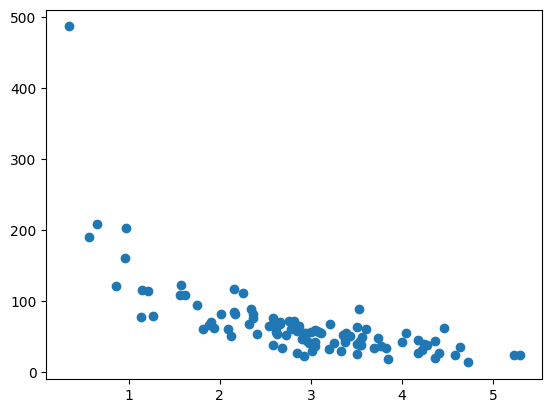

In [14]:
np.random.seed(2)

"""
numpy.random.seed è una funzione nella libreria NumPy che imposta il seed per generare numeri casuali. 
Specificando un valore seed, la funzione garantisce che la sequenza di numeri casuali generati rimanga la stessa in più esecuzioni, 
fornendo un comportamento deterministico e consentendo la riproducibilità nella generazione di numeri casuali.
"""
#Il nostro set di dati possiamo considerarlo come l'esempio di 100 clienti in un negozio e le loro abitudini di acquisto.

#L'asse X rappresenta il numero di minuti prima di effettuare un acquisto.

#L'asse y rappresenta la quantità di denaro spesa per l'acquisto.

X = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / X

plt.scatter(X, y)
plt.show()

In [15]:
X

array([2.58324215, 2.94373317, 0.8638039 , 4.64027081, 1.20656441,
       2.15825263, 3.50288142, 1.75471191, 1.94204778, 2.09099239,
       3.55145404, 5.29220801, 3.04153939, 1.88207455, 3.53905832,
       2.4038403 , 2.9808695 , 4.17500122, 2.25212905, 3.00902525,
       2.12189211, 2.84356583, 3.25657045, 2.01122095, 2.66117803,
       2.76381597, 2.36234499, 1.81238771, 1.57878277, 2.8465048 ,
       2.73094304, 5.23136679, 0.56523242, 3.1127265 , 3.37044454,
       4.35963386, 3.50185721, 2.1557863 , 3.00000976, 3.54235257,
       2.6864918 , 3.77101174, 1.13190935, 4.73118467, 4.46767801,
       2.66432266, 3.61134078, 3.04797059, 2.17086471, 3.08771022,
       4.00036589, 2.61890748, 2.62433058, 2.92552924, 3.43349633,
       4.27837923, 2.36532069, 3.50839624, 3.21611601, 1.14138761,
       2.58068352, 2.8676711 , 2.96042976, 3.32600343, 0.95967695,
       3.04625552, 2.32232442, 1.56056097, 3.52429643, 3.73527958,
       2.34674973, 3.84245628, 2.61848352, 3.06648901, 1.90126

In [16]:
y

array([ 76.05204933,  56.20180641, 121.17874037,  36.05903817,
       114.23885932, 117.41526024,  63.77986643,  95.52998052,
        62.4237197 ,  60.57574247,  38.57519009,  24.10914678,
        37.45148182,  67.13926856,  39.26265343,  53.79918302,
        40.94657678,  27.02857247, 111.90190427,  30.26663537,
        51.4368334 ,  58.83311239,  42.08623741,  83.01076429,
        68.37843898,  72.54627253,  76.22874513,  60.83111238,
       123.11113005,  27.89501382,  53.25015791,  24.86406278,
       190.30762228,  55.79245737,  42.32964984,  43.76381026,
        25.90093643,  85.28325651,  56.63901768,  43.77321677,
        34.70979433,  37.10649687,  77.86225629,  14.09666443,
        62.93869329,  70.87521926,  61.39097018,  43.58292288,
        81.92492065,  57.61442568,  43.5111781 ,  57.3316853 ,
        53.67848811,  22.97550427,  50.79538368,  39.01941998,
        82.32095959,  39.62788318,  68.30365792, 115.73628743,
        38.66530343,  65.39332448,  44.34023444,  30.00

Suddividiamo in Train/Test <br>
Il set di addestramento dovrebbe essere una selezione casuale dell'80% dei dati originali.

Il set di test dovrebbe essere il restante 20%.

In [17]:
train_X = X[:80]
train_y = y[:80]

test_X = X[80:]
test_y = y[80:]

o in alternativa possiamo usare la funzione integrata di scikit-learn

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y)


### Attributi opzionali
- test_size: float o int, default=Nessuno
Se float, dovrebbe essere compreso tra 0,0 e 1,0 e rappresentare la proporzione del set di dati da includere nella suddivisione del test. Se int, rappresenta il numero assoluto di campioni di prova. Se Nessuno, il valore viene impostato sul complemento della dimensione del train. Se train_size è anche None, verrà impostato su 0,25.

- train_size: float o int, default=Nessuno
Se float, deve essere compreso tra 0,0 e 1,0 e rappresentare la proporzione del set di dati da includere nella suddivisione del train. Se int, rappresenta il numero assoluto di campioni di train. Se Nessuno, il valore viene impostato automaticamente sul complemento della dimensione del test.

- random_state: int, istanza RandomState o None, default=None
Controlla il mescolamento applicato ai dati prima di applicare la suddivisione. Passa un int per un output riproducibile tra più chiamate di funzione.

- shuffle: bool, impostazione predefinita=Vero
Se mescolare o meno i dati prima di dividerli. Se shuffle=False allora la stratificazione deve essere None.

- stratify: array, default=Nessuno
Se non è impostato su Nessuno, i dati vengono suddivisi in modo stratificato, utilizzandolo come etichetta della classe. 

### Ora visualizziamo il set di allenamento e il set di test

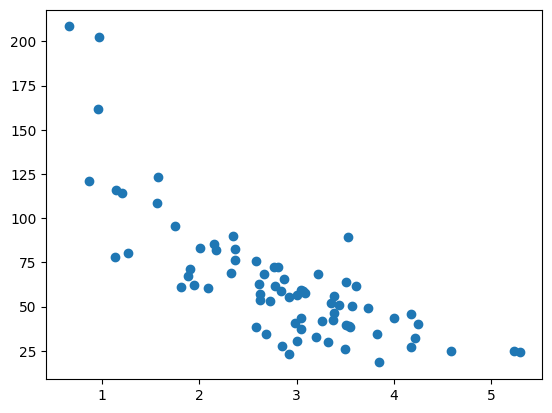

In [19]:
plt.scatter(X_train, y_train)
plt.show()

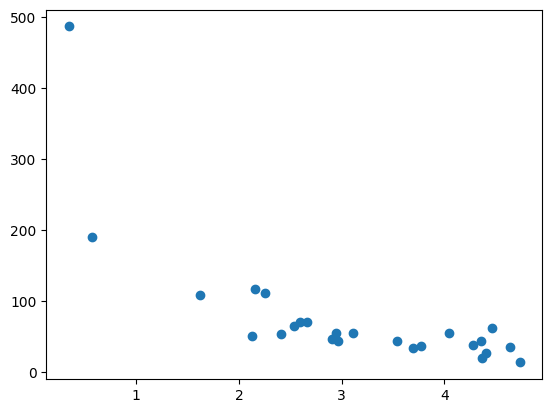

In [20]:
plt.scatter(X_test, y_test)
plt.show()

Assomigliano molto al set originale quindi possiamo riternerci soddisfatti.
### Ora procediamo a:
- Allenare il modello con i set di allenamento;
- Usare il modello per prevedere in base ai dati di allenamento il target di allenamento;
- Confrontare le previsioni con i dati reali.


In [21]:
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)
y_pred = model.predict(X_train.reshape(-1, 1))
errore = y_train - y_pred
media_errore = errore.mean()
mediana_errore = np.median(errore)
print(f"media: {media_errore}, mediana: {mediana_errore}")




media: -3.268496584496461e-15, mediana: -0.232840425750922


### Ora facciamo la stessa cosa con i dati di test

In [22]:
y_pred_test = model.predict(X_test.reshape(-1, 1))
errore = y_test - y_pred_test
media_errore = errore.mean()
mediana_errore = np.median(errore)
print(f"media: {media_errore}, mediana: {mediana_errore}")

media: 22.018550527662928, mediana: 2.7432116239998408


### Scikit learn ci permette anche di calcolare l'errore quadratico medio di cui abbiamo parlato in precedenza

In [23]:
from sklearn.metrics import mean_squared_error

error_train = mean_squared_error(y_train, y_pred)
error_test = mean_squared_error(y_test, y_pred_test)
print(f"test: {error_test}, train: {error_train}")


test: 5485.229943500438, train: 501.91666539155716


### Ma anche di visualizzazire l'errore di previsione di un modello di regressione.

Questo strumento può visualizzare “residui rispetto a quelli previsti” o “effettivi rispetto a quelli previsti” utilizzando grafici a dispersione per valutare qualitativamente il comportamento di un regressore, preferibilmente su punti dati non disponibili.

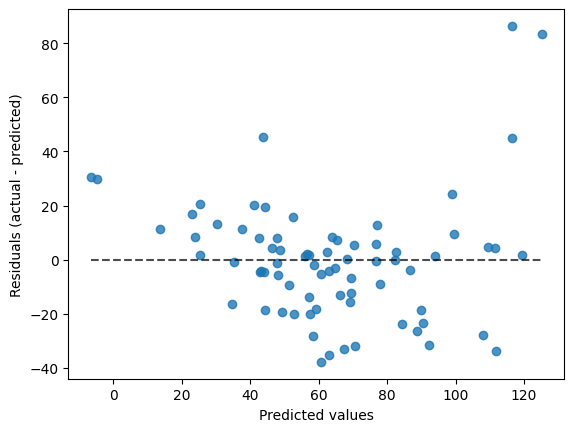

In [24]:
from sklearn.metrics import PredictionErrorDisplay
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred)
display.plot()
plt.show()

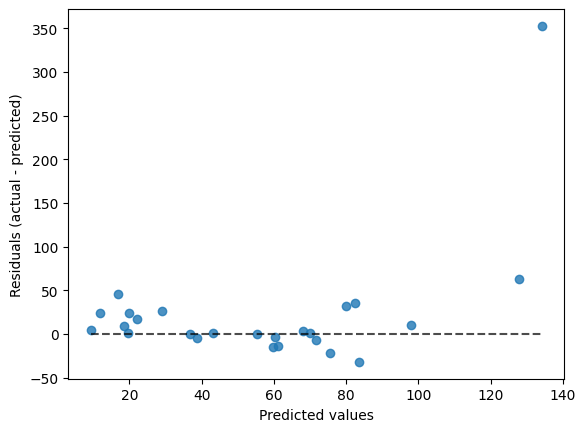

In [25]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_test)
display.plot()
plt.show()

## Primo Esempio pratico
### L'esempio seguente utilizza solo la prima caratteristica di un dataset sul diabete fornito da scikit learn per testare un algoritmo di machine learning su dati reali.
La linea retta vista nel grafico, mostra come la regressione lineare tenta di tracciare una linea retta che minimizzi al meglio la somma residua dei quadrati tra le risposte osservate nel set di dati e le risposte previste dall'approssimazione lineare.

Vengono inoltre calcolati i coefficienti, la somma residua dei quadrati e il coefficiente di determinazione.

In [26]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# carichiamo il dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [27]:
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10))

In [28]:
diabetes_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [29]:
# utilizziamo una sola caratteristicha
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [30]:
diabetes_X.shape

(442, 1)

In [31]:
# dividiamo i dati in train e test
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# dividiamo le etichette in train e test
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [32]:
from sklearn.model_selection import train_test_split
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes_X, diabetes_y)

In [33]:
# Creaiamo l'oggetto del modello
regr = linear_model.LinearRegression()

# Alleniamo il modello sul set di allenamento
regr.fit(diabetes_X_train, diabetes_y_train)

# Facciamo una predizione sui dati usando i dati di test
diabetes_y_pred = regr.predict(diabetes_X_test)

In [34]:
# Stampiamo il coefficente
print("Coefficients: \n", regr.coef_)
# L'errore quadratico medio 
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Il coefficiente di determinazione: 1 è la previsione perfetta
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [964.21465307]
Mean squared error: 4656.29
Coefficient of determination: 0.21


In [35]:
diabetes_y_train_pred = regr.predict(diabetes_X_train)

In [36]:
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_train, diabetes_y_train_pred))

Coefficient of determination: 0.38


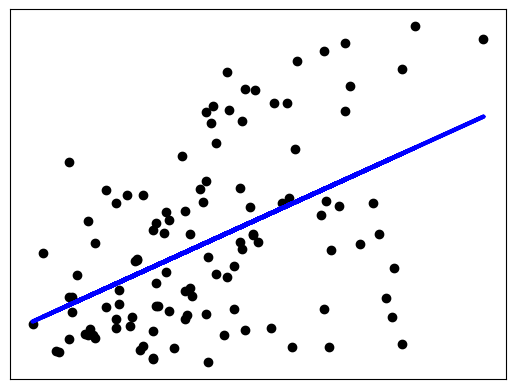

In [37]:
# Creiamo i grafici
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Primo Esercizio
Utilizzate la linear regression per analizzare il dataframe di esempio in cui abbiamo le Calorie bruciate in base al peso della persona che fa esercizio fisico con la montain bike, allenate l'algoritmo, testatelo e poi realizzate un grafico

## Secondo Esercizio
Utilizzate la linear regression per analizzare il dataframe di esempio con Fabbisogno calorico giornaliero di un uomo in base alla sua età, allenate l'algoritmo, testatelo e poi realizzate un grafico.